In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [409]:
train=pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [410]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [412]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [413]:
train.isnull().sum().sort_values(ascending=False)        ##getting the null values in the ascending form.

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [414]:
train.Item_Weight.dtypes

dtype('float64')

In [415]:
train.size

102276

In [416]:
train.shape

(8523, 12)

In [417]:
train.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [418]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


## It seems as ITEM MRP has a very good correlation with Item_Outlet_Sales

<Figure size 1440x720 with 0 Axes>

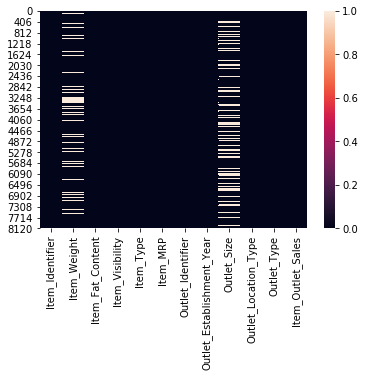

<Figure size 1440x720 with 0 Axes>

In [419]:
sns.heatmap(train.isnull())
plt.figure(figsize=(20,10))

## Staring with the first column

In [420]:
train.Item_Identifier.value_counts()  ##after running it seems as a categorical variable .

FDW13    10
FDG33    10
NCJ30     9
FDX31     9
FDV60     9
         ..
FDK57     1
FDN52     1
FDQ60     1
FDE52     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [421]:
train.drop(['Item_Identifier'],axis=1,inplace=True)

In [422]:
#2nd columns

#Item_Weight is less correlated so we can drop it

train.drop(columns=['Item_Weight'],axis=1,inplace=True)

In [423]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [424]:
pd.get_dummies(train).corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625,0.001885,-0.046386,0.047631,-0.001860,0.000523,0.016887,...,-0.041937,-0.081061,0.063502,0.061346,-0.068787,0.009650,0.286400,-0.144249,-0.034671,-0.051144
Item_MRP,-0.001315,1.000000,0.005020,0.567574,-0.006947,-0.000466,0.008299,-0.011904,-0.008865,-0.067311,...,0.002438,-0.004510,0.009793,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-0.006714
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135,0.002458,0.002218,-0.002051,-0.026852,0.021281,-0.003546,...,-0.453388,-0.016346,-0.056567,-0.201690,0.540820,-0.333895,-0.281196,0.245070,0.466336,-0.538072
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000,-0.012389,-0.011993,0.022618,-0.006326,-0.015148,-0.038381,...,0.024170,0.204701,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,0.311192
Item_Fat_Content_LF,0.001885,-0.006947,0.002458,-0.012389,1.000000,-0.238873,-0.140513,-0.022643,-0.023150,-0.009431,...,-0.005084,0.001913,0.010318,-0.006275,-0.010932,0.016267,0.009036,-0.019290,0.015137,0.004637
Item_Fat_Content_Low Fat,-0.046386,-0.000466,0.002218,-0.011993,-0.238873,1.000000,-0.871729,-0.140476,-0.143620,-0.077541,...,-0.000374,-0.003910,-0.000454,0.000079,0.008213,-0.007960,-0.003339,0.008565,-0.005452,-0.004041
Item_Fat_Content_Regular,0.047631,0.008299,-0.002051,0.022618,-0.140513,-0.871729,1.000000,-0.082632,-0.084482,0.080754,...,-0.002316,0.002783,0.000856,0.001960,-0.002123,0.000237,-0.002307,-0.000734,-0.002037,0.005605
Item_Fat_Content_low fat,-0.001860,-0.011904,-0.026852,-0.006326,-0.022643,-0.140476,-0.082632,1.000000,-0.013614,-0.002003,...,0.018992,-0.005932,-0.005461,-0.003167,-0.003509,0.006282,0.011658,-0.007121,-0.010567,0.008945
Item_Fat_Content_reg,0.000523,-0.008865,0.021281,-0.015148,-0.023150,-0.143620,-0.084482,-0.013614,1.000000,0.015616,...,0.000665,0.007860,-0.012981,0.004981,-0.004797,0.000026,-0.002625,0.005176,0.017030,-0.022054
Item_Type_Baking Goods,0.016887,-0.067311,-0.003546,-0.038381,-0.009431,-0.077541,0.080754,-0.002003,0.015616,1.000000,...,0.003036,-0.008819,0.005364,0.003392,-0.000701,-0.002446,0.003536,0.001846,-0.003632,-0.002957


In [425]:
#3rd column

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [426]:
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [427]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##  Some extra steps 

In [430]:
#sns.barplot(x='Item_Type',y='Item_Weight',data=train)

In [431]:
#sns.scatterplot(x='Item_Weight',y='Item_MRP',data=train)

In [432]:
#sns.scatterplot(x='Item_Visibility',y='Item_Weight',data=train)

In [434]:
#sns.scatterplot(x='Item_Weight',y='Item_MRP',hue='Item_Type',data=train)

In [369]:
#train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [435]:
#train.Item_Weight.head()

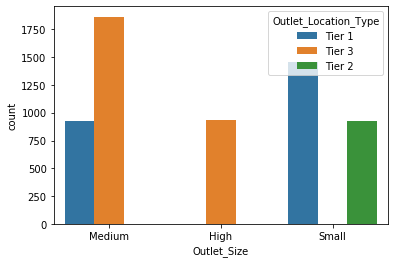

In [437]:
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=train)

In [438]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [439]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

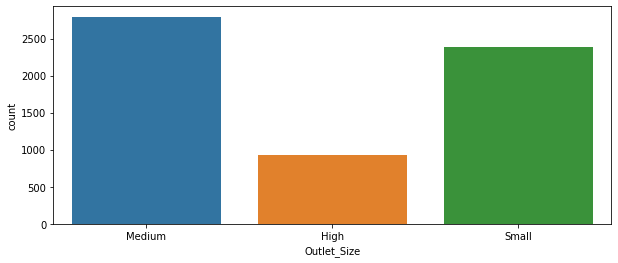

In [440]:
plt.subplots(figsize=(10,4))
sns.countplot(train['Outlet_Size'])

In [441]:
train["Outlet_Size"] = train["Outlet_Size"].fillna('Medium')

In [442]:
train.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [443]:
train_dum=pd.get_dummies(train,drop_first=True)

In [444]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [445]:
train_dum.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,0.019278,48.2692,2009,443.4228,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0.000000,182.0950,1998,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [446]:
train_dum.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625,0.047314,0.000416,0.043418,0.011114,0.035984,-0.003153,...,-0.038353,-0.038444,-0.036130,-0.031642,0.063502,-0.068787,0.009650,-0.144249,-0.034671,-0.051144
Item_MRP,-0.001315,1.000000,0.005020,0.567574,0.006063,-0.000112,0.001460,-0.005666,0.035551,-0.013358,...,-0.000239,0.005983,-0.003906,-0.010578,0.009793,0.001951,-0.000744,0.004885,0.003850,-0.006714
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135,0.003151,-0.003631,-0.006768,0.010998,-0.005286,0.007690,...,0.174150,-0.034777,0.048836,0.342251,-0.056567,0.540820,-0.333895,0.245070,0.466336,-0.538072
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000,0.018719,0.002332,-0.004656,0.007387,0.008858,-0.009482,...,0.002274,0.019803,0.034264,0.075154,-0.098403,0.058261,0.046376,0.108765,-0.038059,0.311192
Item_Fat_Content_Regular,0.047314,0.006063,0.003151,0.018719,1.000000,0.032643,0.065711,0.073235,0.021236,0.085041,...,-0.006029,0.003147,0.004722,0.003495,-0.002313,-0.003272,0.000241,0.000533,0.002129,0.000183
Item_Type_Breads,0.000416,-0.000112,-0.003631,0.002332,0.032643,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,...,0.012563,-0.003090,-0.005316,0.002523,0.001042,0.002933,0.001909,-0.006189,-0.000734,0.007693
Item_Type_Breakfast,0.043418,0.001460,-0.006768,-0.004656,0.065711,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,...,-0.006638,-0.006677,0.003325,-0.000322,-0.001898,-0.008741,0.003754,-0.008695,0.000077,-0.003550
Item_Type_Canned,0.011114,-0.005666,0.010998,0.007387,0.073235,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,...,0.004627,0.001679,-0.005415,-0.001082,0.007054,0.009366,-0.004612,0.001236,0.010418,0.001136
Item_Type_Dairy,0.035984,0.035551,-0.005286,0.008858,0.021236,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,...,-0.007406,0.004969,0.004969,-0.010941,0.006659,-0.008162,-0.004482,0.003396,-0.001746,-0.010817
Item_Type_Frozen Foods,-0.003153,-0.013358,0.007690,-0.009482,0.085041,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,...,-0.015411,0.018274,-0.000505,-0.006051,0.007965,-0.000590,-0.007556,0.009750,-0.001507,-0.006128


# Creating ML Model

In [447]:
x=train_dum.drop(['Item_Visibility','Outlet_Establishment_Year','Item_Type_Breakfast','Item_Type_Frozen Foods','Item_Type_Hard Drinks',
               'Item_Type_Health and Hygiene','Item_Type_Meat','Item_Type_Others','Item_Type_Soft Drinks','Outlet_Identifier_OUT018',
               'Outlet_Identifier_OUT019','Outlet_Type_Supermarket Type2','Outlet_Size_Small','Item_Outlet_Sales'],axis=1)

y=train_dum['Item_Outlet_Sales']

In [448]:
from sklearn.model_selection import train_test_split

In [449]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [496]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')   ## for ignoring warnings 

In [497]:
clf = RandomForestRegressor()

param_dist = {"n_estimators": [50, 100, 150,200]}

clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [452]:
y_pred=clf.predict(x_test)

In [453]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

print('*'*20)


print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('*'*20)


r2_score=metrics.r2_score(y_test,y_pred)
print('r2_score:',r2_score)

MAE: 935.5664601924033
********************
RMSE: 1322.0662210926662
********************
r2_score: 0.39071427933848035


# KNN

In [454]:
from sklearn.neighbors import KNeighborsRegressor

In [455]:
clf_kn=KNeighborsRegressor(n_neighbors=9)

clf_kn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [456]:
y_pred_kn = clf_kn.predict(x_test)

In [457]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_kn))

print('*'*20)


print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_kn)))
print('*'*20)


r2_score=metrics.r2_score(y_test,y_pred_kn)
print('r2_score:',r2_score)

MAE: 906.321150316064
********************
RMSE: 1244.1713877114614
********************
r2_score: 0.46039619793565156


# Linear Regression

In [459]:
from sklearn.linear_model import LinearRegression

In [460]:
clf_lr=LinearRegression()

clf_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [461]:
y_pred_lr=clf_lr.predict(x_test)

In [462]:
len(y_test)

1705

In [463]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lr))

print('*'*20)


print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))
print('*'*20)


r2_score=metrics.r2_score(y_test,y_pred_lr)
print('r2_score:',r2_score)

MAE: 880.0285835694352
********************
RMSE: 1174.4045248291818
********************
r2_score: 0.5192159920647187


# Decision Tree

In [465]:
from sklearn.tree import DecisionTreeRegressor

In [466]:
clf_dt=DecisionTreeRegressor()
clf_dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [467]:
y_pred_dt=clf_dt.predict(x_test)

In [468]:
len(y_pred_dt)

1705

In [469]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dt))

print('*'*20)


print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))
print('*'*20)


r2_score=metrics.r2_score(y_test,y_pred_dt)
print('r2_score:',r2_score)

MAE: 1130.8425560703813
********************
RMSE: 1588.1268839272925
********************
r2_score: 0.12080547089272486


# FOR TEST DATA

In [471]:
test=pd.read_csv("test.csv")

In [472]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [475]:
test.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [477]:
test.shape

(5681, 11)

In [483]:
test.size

62491

In [488]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [489]:
test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


In [490]:
test.drop(['Item_Weight','Item_Identifier'],axis=1,inplace=True)

In [492]:
test.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
dtype: int64

In [493]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [494]:
test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

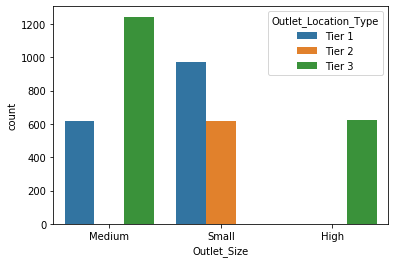

In [498]:
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=test)

In [499]:
test.Outlet_Size.value_counts()


Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [500]:
test.Outlet_Type.value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

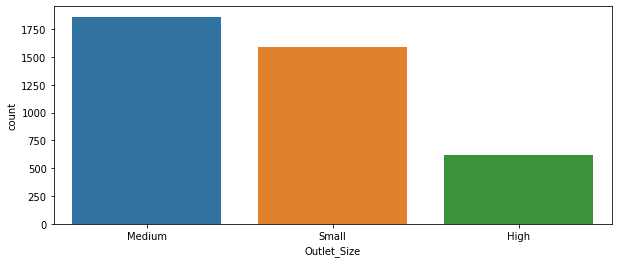

In [501]:
plt.subplots(figsize=(10,4))
sns.countplot(test['Outlet_Size'])

In [502]:
test["Outlet_Size"] = test["Outlet_Size"].fillna('Medium')

In [503]:
test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [504]:
test.isnull().sum().sort_values(ascending=False)

Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
dtype: int64

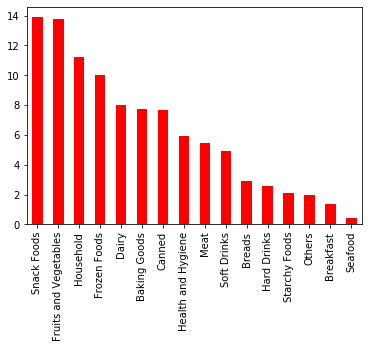

In [505]:
(test['Item_Type'].value_counts()/len(test['Item_Type'])*100).plot(x='Item_Type', y= 'Item_MRP',kind='bar',color='red')

In [507]:
df_test=pd.get_dummies(test,drop_first=True)

In [508]:
df_test.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Visibility,1.000000,-0.014013,-0.097040,0.039707,0.029990,0.027407,0.009639,0.025876,0.027177,0.023196,...,-0.028160,-0.040428,-0.064145,-0.027624,0.053813,-0.065857,0.030666,-0.155995,-0.049538,-0.018848
Item_MRP,-0.014013,1.000000,-0.007233,-0.019244,0.002887,-0.016094,-0.019138,0.020517,-0.041139,0.018371,...,-0.001728,-0.011635,0.008145,0.016900,-0.017005,-0.003432,0.003107,-0.006942,-0.005879,0.010248
Outlet_Establishment_Year,-0.097040,-0.007233,1.000000,-0.004378,0.001531,0.004393,-0.014437,0.009978,-0.017879,0.005473,...,0.174233,-0.034656,0.048963,0.341861,-0.056351,0.540971,-0.334190,0.245545,0.466210,-0.538308
Item_Fat_Content_Regular,0.039707,-0.019244,-0.004378,1.000000,0.053765,0.077103,0.100840,0.027320,0.106598,0.051578,...,0.009052,-0.006716,-0.007896,-0.003658,0.001551,0.004195,0.002834,-0.003156,-0.002342,-0.000127
Item_Type_Breads,0.029990,0.002887,0.001531,0.053765,1.000000,-0.020140,-0.049804,-0.050972,-0.057758,-0.069049,...,-0.020112,-0.000025,0.006699,-0.003708,-0.000556,-0.008730,0.000310,0.000094,0.000171,-0.013823
Item_Type_Breakfast,0.027407,-0.016094,0.004393,0.077103,-0.020140,1.000000,-0.033531,-0.034318,-0.038887,-0.046489,...,0.008453,0.008381,-0.006360,-0.004382,0.009219,0.010358,-0.009012,0.007327,-0.001317,0.003196
Item_Type_Canned,0.009639,-0.019138,-0.014437,0.100840,-0.049804,-0.033531,1.000000,-0.084866,-0.096165,-0.114963,...,-0.002969,0.001117,0.009609,0.001971,-0.010172,-0.011455,0.002734,0.003320,-0.013438,0.000465
Item_Type_Dairy,0.025876,0.020517,0.009978,0.027320,-0.050972,-0.034318,-0.084866,1.000000,-0.098421,-0.117660,...,0.013609,-0.007386,-0.007386,0.017110,-0.010444,0.016162,0.003387,-0.001428,0.003361,0.016884
Item_Type_Frozen Foods,0.027177,-0.041139,-0.017879,0.106598,-0.057758,-0.038887,-0.096165,-0.098421,1.000000,-0.133325,...,0.020482,-0.030453,-0.000390,0.003653,-0.004869,-0.001525,0.007141,-0.020872,-0.000013,0.006354
Item_Type_Fruits and Vegetables,0.023196,0.018371,0.005473,0.051578,-0.069049,-0.046489,-0.114963,-0.117660,-0.133325,1.000000,...,-0.016566,0.014369,-0.006943,-0.011286,0.020645,-0.002349,-0.007309,-0.005371,-0.001576,-0.009457


In [509]:
df_test=df_test.drop(['Item_Visibility','Outlet_Establishment_Year','Item_Type_Breakfast','Item_Type_Frozen Foods','Item_Type_Hard Drinks',
               'Item_Type_Health and Hygiene','Item_Type_Meat','Item_Type_Others','Item_Type_Soft Drinks','Outlet_Identifier_OUT018',
               'Outlet_Identifier_OUT019','Outlet_Type_Supermarket Type2','Outlet_Size_Small'],axis=1)

In [510]:
from sklearn.linear_model import LinearRegression

In [511]:
y_pred_test= clf.predict(df_test)

In [512]:
Y=pd.DataFrame(y_pred_test)

In [513]:
sm=pd.read_csv("Sample_Submission.csv")

In [514]:
sm.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [515]:
submit=pd.concat([sm.Item_Identifier,sm.Outlet_Identifier,Y],axis=1)

In [516]:
submit.head()

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1288.58932
1,FDW14,OUT017,850.42634
2,NCN55,OUT010,3286.98802
3,FDQ58,OUT017,1742.19886
4,FDY38,OUT027,7362.01692


In [517]:
submit.to_csv('bigmartsol.csv',index=False)